In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import smithchart as sc

In [2]:
# s = sc.smith(1, size=8)
# s.markZ(0.5+0.5*1j, c='g', ms=6)
# s.show()

Suponha uma linha de transmissão com caracteristicas:
\begin{align}
R &=7\times10^{-3}  &\Omega/m\\
L &=3\times10^{-6}  &H/m\\
G &=4\times10^{9}   &S/m\\
C &=6\times10^{-12} &F/m
\end{align}

Calcule:

In [3]:
R=7e-3
L=1e-9
G=4e9
C=6e-12

f = 2e3 # frequência do sinal na fonte

beta = 1/np.sqrt(L*C)
tau = 1/f

lambda_ = 2*np.pi/beta
omega = 2*np.pi*f

Ns = 101
#X = 3*lambda_
X = 3.7*lambda_
x = np.linspace(0, X, Ns)
t = tau/2

In [4]:
print(lambda_)

4.866934411168334e-10


Primeiramente vamos executar os calculos assumindo que a linha é sem perdas. Ou seja $R=G=0$.

In [5]:
# A tensão $V(X)$ ao longo da linha a uma distância $d$

A = 1
B = 0.5

vp = A * np.exp(-1j*beta*x)
vn = B * np.exp( 1j*beta*x)

vx = (vp + vn)
vxt = ( vx * np.exp(1j*omega*t) ).real

# Para calcularmos a corrente é preciso conhecermos a 
# impedancia caracteristica da linha

z0 = np.sqrt(L/C)
ix = vp/z0 - vn/z0
ixt = ( ix * np.exp(1j*omega*t) ).real

print(z0)

12.909944487358056


(0.0, 1.8007657321322838e-09)

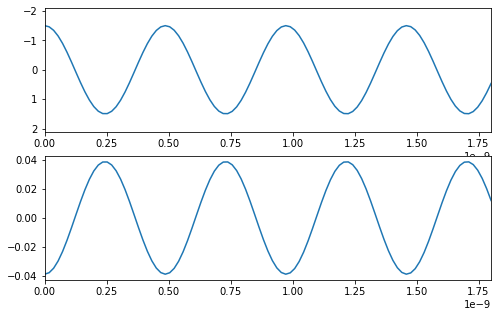

In [6]:
plt.figure(figsize=(8,5))

plt.subplot(211)
plt.plot(x, vxt)
plt.xlim(0, x.max())
plt.ylim(2.1,-2.1)

plt.subplot(212)
plt.plot(x, ixt)
plt.xlim(0, x.max())
# plt.ylim(0.01,-0.01)

In [7]:
from ipywidgets import interact#, interactive, fixed, interact_manual
import ipywidgets as widgets

def plot_func(A, B, t):
  vp = A * np.exp(-1j*beta*x)
  vn = B * np.exp( 1j*beta*x)

  # print(np.exp(1j*omega*t))

  vx = (vp + vn)
  vxt = ( vx * np.exp(1j*omega*t) ).real
  
  ix = vp/z0 - vn/z0
  ixt = ( ix * np.exp(1j*omega*t) ).real

  plt.figure(figsize=(8,4))

  plt.subplot(211)
  plt.plot(x, vxt)
  plt.xlim(0, x.max())
  plt.ylim(2,-2)

  plt.subplot(212)
  plt.plot(x, ixt)
  plt.xlim(0, x.max())
  # plt.ylim(0.01,-0.01)

In [8]:
interact(plot_func,
      A=widgets.FloatSlider(min=0.0, max=1, step=0.1, value=1.0),
      B=widgets.FloatSlider(min=0.0, max=1, step=0.1, value=0.0),
      t=widgets.FloatSlider(min=0.0, max=2*tau, step=tau/60, value=0.0))

interactive(children=(FloatSlider(value=1.0, description='A', max=1.0), FloatSlider(value=0.0, description='B'…

<function __main__.plot_func(A, B, t)>

In [9]:
# http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
# http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-as-interactive-javascript-widgets/
# https://towardsdatascience.com/the-simplest-way-of-making-gifs-and-math-videos-with-python-aec41da74c6e
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

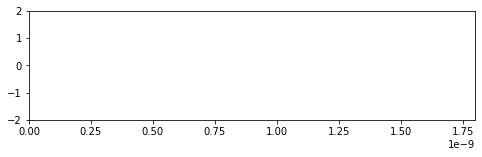

In [10]:
# First set up the figure, the axis, and the plot element we want to animate
# %%capture

fig, ax = plt.subplots()

fig.set_size_inches(8,2)
ax.set_xlim((0, x.max()))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    vp = A * np.exp(-1j*beta*x)
    vn = B * np.exp( 1j*beta*x)

    vx = (vp + vn)
    vxt = ( vx * np.exp(1j*omega*time[i]) ).real

    line.set_data(x, vxt)
    return (line,)

In [11]:
time = np.arange(0, tau, tau/100)
A = 1
B = 0.6

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=60, interval=40, blit=True)
# HTML(anim.to_html5_video())
HTML(anim.to_jshtml())

(2.1, -2.1)

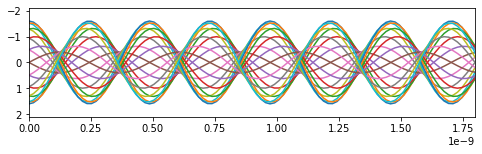

In [12]:
plt.figure(figsize=(8,2))

vp = A * np.exp(-1j*beta*x)
vn = B * np.exp( 1j*beta*x)

vx = (vp + vn)

timee = np.arange(0, tau, tau/20)

for t in timee:
    vxt = ( vx * np.exp(1j*omega*t) ).real
    plt.plot(x, vxt)

plt.xlim(0, x.max())
plt.ylim(2.1,-2.1)

![text](figures/reflection.png)

In [13]:
Z0 = 50
#l = 3*lambda_ # line length
l = X

Vx = lambda A, B, x : (   A * np.exp(-1j*beta*x) +    B * np.exp(1j*beta*x))
Ix = lambda A, B, x : (A/Z0 * np.exp(-1j*beta*x) - B/Z0 * np.exp(1j*beta*x))

In [14]:
def animate(i):
    vxt = ( Vx(A, B, x) * np.exp(1j*omega*time[i]) ).real
    line.set_data(x, vxt)
    return (line,)

time = np.arange(0, tau, tau/100)
A = 1
B = 0.6

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=60, interval=40, blit=True)
#HTML(anim.to_html5_video())
HTML(anim.to_jshtml())

Also because $x=l-d$, $V(x)$ can be writen as 
\begin{align}
V(x=l-d)&=Ae^{-j\beta x} + Be^{j\beta x}\\
&=Ae^{-j\beta (l-d)} + Be^{j\beta (l-d)}\\
&=Ae^{-j\beta l}e^{j\beta d} + Be^{j\beta l}e^{-j\beta d}\\
V(d)&=A_1e^{j\beta d} + B_1e^{-j\beta d}\\
\end{align}

in this case $A_1=Ae^{-j\beta l}$ and $B_1=Be^{j\beta l}$. Therefore:

In [15]:
Vd = lambda A, B, d : (   A * np.exp(-1j*beta*(l-d)) +    B * np.exp(1j*beta*(l-d)))
Id = lambda A, B, d : (A/Z0 * np.exp(-1j*beta*(l-d)) - B/Z0 * np.exp(1j*beta*(l-d)))

In [16]:
d = np.linspace(0, X, Ns)

def animate(i):
    vdt = ( Vd(A, B, d) * np.exp(1j*omega*time[i]) ).real
    line.set_data(l-d, vdt)
    return (line,)

time = np.arange(0, tau, tau/100)
A = 1
B = 0.6

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=60, interval=40, blit=True)
# HTML(anim.to_html5_video())
HTML(anim.to_jshtml())

MovieWriter imagemagick unavailable; using Pillow instead.


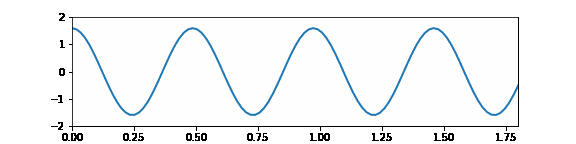

In [17]:
# !pip install imagemagick
from PIL import Image  
anim.save('animation.gif', writer='imagemagick', fps=60)
Image.open('animation.gif')

In [18]:
def animate(i):
    vdt = ( Vd(A, B, d) * np.exp(1j*omega*time[i]) ).real
    vxt = ( Vx(A, B, x) * np.exp(1j*omega*time[i]) ).real
    line.set_data([l-d, x], [vdt, vxt])
    return (line,)

time = np.arange(0, tau, tau/100)
A = 1
B = 0.6

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=60, interval=40, blit=True)
#HTML(anim.to_html5_video())
HTML(anim.to_jshtml())

O interesse em modificar a variavel das funções $V(x)$ e $I(x)$ é mudar o plano de referência. Podemos agora sugerir que "_a reflexão no plano de carga_" é diferente da "_reflexão no plano de fonte_". No caso de uma linha de transmisão sem perdas, tem-se que a o sinal apenas sofre defasagem entre fonte e carga.

---
The reflection coefficient is defined as the ratio of the incident to the reflected wave along a transmission line. Therefore, the reflection coefficient defined at any point position $d$ is denoted by

\begin{align}
\Gamma_{IN}(d)&=\dfrac{B_1e^{-j\beta d}}{A_1e^{j\beta d}}=\dfrac{B_1}{A_1}e^{-2j\beta d}
\end{align}

Considering that $d=0$ is the distance of the line to the load (_the reference plane is the load_), therefore
$$
\Gamma_{IN}(0)=\Gamma_0=\dfrac{B_1}{A_1}
$$

Look that in this context, we can rewrite $\Gamma_{IN}$ as 
$$
\Gamma_{IN}=\Gamma_0e^{-2j\beta d}
$$

As we can see, the reclection coefficient is a function of the material load (given by $\Gamma_0$), line parameter (given by $\beta$) and the distance $d$ from the load.

With these equations, we can also express $V(d)$ and $I(d)$ in the form

\begin{align}
V(d)&=A_1(e^{j\beta d} + \Gamma_0e^{j\beta d}) = A_1e^{j\beta d}(1+\Gamma_0 e^{-2j\beta d})\\
I(d)&=\dfrac{A_1}{Z_0}(e^{j\beta d} - \Gamma_0e^{j\beta d}) = \dfrac{A_1}{Z_0}e^{j\beta d}(1-\Gamma_0 e^{-2j\beta d})
\end{align}

where both equations are functions of $A_1$, that is the insident wave. This is convenient in situations when we know the value of $V(d)$ (boundary condition), as in the source for example, and wer want to find the complex constant $A_1$.

In this point, if we want to find the impedance of the line according to the distance $d$, for example, we can do
\begin{align}
Z_{IN}(d)&=\dfrac{V(d)}{I(d)}=Z_0\dfrac{e^{j\beta d}+\Gamma_0e^{-j\beta d}}{e^{j\beta d}-\Gamma_0e^{-j\beta d}}
\end{align}


Considering that $d=0$ is the load plan then $Z_{IN}(0)=Z_L$, therefore
\begin{align}
Z_{IN}(d)&=Z_0\dfrac{1+\Gamma_0}{1-\Gamma_0}
\end{align}
and
\begin{align}
\Gamma_0&=Z_0\dfrac{Z_L-Z_0}{Z_L+Z_0}
\end{align}